# Visualização de Dados Científicos

Em Ciência de Dados, a Visualização de Dados é uma fase importante que envolve a representação gráfica de informações. Através de elementos visuais, ela permite a **atribuição de sentido e a comunicação de tendências e padrões nos dados**.

<br>

> **Por que criar visualizações usando Jupyter?** 🤔

Além do suporte simplificado do Jupyter, a linguagem Python oferece uma variedadede bibliotecas e módulos de visualização de dados, como <ins>Matplotlib</ins> e <ins>Seaborn</ins>. Ambas  funcionam  muito  bem para a tarefa de visualização, sendo mais poderosas quando comparadas com os recursos adicionais de plotagem incorporados do Pandas.

<br>

O conteúdo deste notebook está organizado de acordo com o **tipo de mensagem ou informação que transmitem**, conforme os tópicos da Seção 1.6. (Visualização de Dados Científicos) do Capítulo:

- [1.6.1. Quantidade](#quantidade)
    - [Gráfico de barras simples](#barras-simples)
    - [Gráfico de barras agrupadas](#barras-agrupadas)
- [1.6.2. Distribuição](#distribuicao)
    - [Histograma](#histograma)
    - [Gráfico de densidade](#densidade)
    - [Boxplots e Gráficos Violino](#boxplots)
- [1.6.3. Correlação](#correlacao)
    - [Gráfico de dispersão](#dispersao)
    - [Gráfico de bolhas](#bolhas)
    - [Correlogramas](#correlogramas)
- [1.6.4. Evolução](#evolucao)
- [Conteúdo Extra](#extra)
    - [Personalização](#personalizacao)
    - [Gráficos interativos](#interativos)

# Conectar com Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

%cd /content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/5.Ciencia.de.Dados

!ls

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab/jai2021-jupyter-colab/5.Ciencia.de.Dados
5.1.Ciencia.Dados.Basica.ipynb	5.2.Visualizacao.ipynb


In [2]:
# Importando os pacotes necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 6)

Neste notebook, vamos trabalhar com três tabelas do nosso conjunto de dados: _Artists, Tracks, e Charts_.

In [3]:
# Lendo os dados
df_artistas = pd.read_table('../dataset/spotify_artists_info_complete.tsv', encoding='utf-8')
df_hits = pd.read_table('../dataset/spotify_hits_dataset_complete.tsv', encoding='utf-8')
df_charts = pd.read_table('../dataset/spotify_charts_complete.tsv', encoding='utf-8', parse_dates=['chart_week'])

---

<a id="quantidade"></a>
## Quantidade

Ao visualizarmos quantidades, estamos interessados em analisar a **magnitude** de algum conjunto de números.

A visualização mais utilizada para este cenário é o **gráfico de barras**, que pode ter barras <ins>simples, agrupadas ou empilhadas</ins>. Em um gráfico de barras, cada entidade da variável categórica é representada como uma barra e o tamanho da barra representa seu valor numérico.

Utilizando nossos dados, suponha que queremos visualizar a **o total de streams** de músicas com relação ao **número de artistas presentes** (Solo/Colaboração). Além disso, queremos desmembrar essa visualização também de acordo com o **tipo de letra** (explícita ou não).

> **IMPORTANTE:** Note que já criamos visualizações com gráficos de barras no notebook anterior, mas o foco aqui reside na construção da visualização, apresentando comandos Python mais poderosos.

O primeiro passo então é agregar os _DataFrames_ contendo informações dos hits e dos charts, para obter a quantidade de músicas Solo/Colaboração (`df_hits`) e o total de streams (`df_charts`).

In [4]:
# Junção dos dois DataFrames
data = pd.merge(df_hits, df_charts, on='song_id')

# Agrupando o DataFrame resultante pelo tipo de música e agregando os valores das variáveis numéricas
df = data.groupby(by=['song_type']).sum()
df = df.reset_index()
df.head()

,song_type,popularity,explicit,...,tempo,position,streams
0,Collaboration,355077,2014,...,552656.865,451801,41018982499
1,Solo,450823,2226,...,704102.936,593399,53777416027


> **DICA:** A integração de fontes de dados já foi abordada anteriormente neste curso. Se ainda tiver dúvidas, revisite o notebook desta parte e releia o texto da Seção 1.3.2. (Integração de Dados) do Capítulo.

In [5]:
# Criando o DataFrame
df = pd.DataFrame({
    'Tipos de Música': df.song_type,
    'Total de Streams': df.streams
})

<a id="barras-simples"></a>
### Gráfico de barras simples

Neste exemplo de gráfico de barras, considere o **total de streams no Spotify para as músicas solo e colaborativas** mais populares em 2020. 

No exemplo a seguir, mostramos como construir um gráfico de barras simples usando _Matplotlib_ e _Seaborn_. Para cada tipo de música, desenhamos uma barra que começa em zero e se estende até o valor de streams.

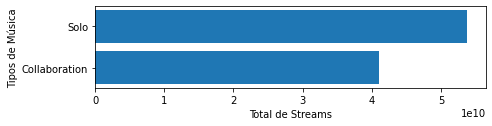

In [6]:
# Criando um gráfico de barras horizontal no Matplotlib
fig, ax = plt.subplots()                   # Inicializa a figura
fig.set_size_inches(7, 1.5)                # Define o tamanho da figura (em polegadas)

ax.barh(y=df['Tipos de Música'],           # Define a variável do eixo y
        width=df['Total de Streams'])      # Define a variável do tamanho da barra

ax.set_xlabel('Total de Streams')          # Título do eixo x
ax.set_ylabel('Tipos de Música')           # Título do eixo y

plt.show()                                 # Oculta a saída da console do Matplotlib

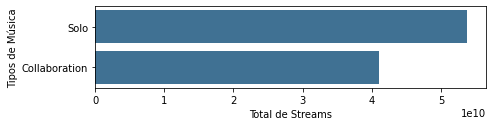

In [7]:
# Criando um gráfico de barras horizontal no Seaborn
sns.barplot(
    data=df,                                    # Define o DataFrame de origem dos dados
    x="Total de Streams",                       # Coluna com os dados do eixo x do gráfico
    y="Tipos de Música",                        # Coluna com os dados do eixo y do gráfico
    order=['Solo', 'Collaboration'],            # Ordem das classes do eixo y
    color='#3274A1'                             # Cor das barras
)     

plt.gcf().set_size_inches(7, 1.5)               # Define o tamanho da figura (em polegadas)
plt.show()                                      # Oculta a saída da console do Seaborn

> **IMPORTANTE:** Na grande maioria dos casos, as bibliotecas Matplotlib e Seaborn são equivalentes, ou seja, o mesmo gráfico pode ser gerado pelas duas bibliotecas. Neste minicurso, optamos sempre pela que apresentar o código mais simples.

<a id="barras-agrupadas"></a>
### Gráfico de barras agrupadas

O exemplo anterior mostra como uma quantidade quantitativa varia em relação a uma variável categórica. Entretanto, frequentemente, estamos interessados em **duas variáveis categóricas ao mesmo tempo**. 

Considere, por exemplo, que queremos saber o total de streams de acordo com a <ins>expliciticidade das músicas, além do tipo da música</ins>. 

Em primeiro lugar, precisamos ragrupar os dados de música, agora de acordo com essas duas variáveis.

In [8]:
# Agrupando o DataFrame 'data' pelo tipo de música e a expliciticidade e agregando os valores das variáveis numéricas
df = data.groupby(by=['song_type', 'explicit']).sum()
df = df.reset_index()
df.head()

,song_type,explicit,popularity,...,tempo,position,streams
0,Collaboration,False,199093,...,294853.524,257806,21419775132
1,Collaboration,True,155984,...,257803.341,193995,19599207367
2,Solo,False,278235,...,427566.058,359947,34681135818
3,Solo,True,172588,...,276536.878,233452,19096280209


In [9]:
# Criando o DataFrame
df = pd.DataFrame({
    'Tipos de Música': df.song_type,
    'Total de Streams': df.streams,
    'Explícita': df.explicit,
})

Agora, podemos plotar um gráfico de barras agrupados no Seaborn utilizando a mesma função `barplot`. A segunda variável categórica é adicionada no parâmetro `hue`. 

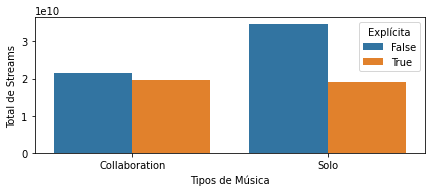

In [10]:
# Criando um gráfico de barras agrupadas
sns.barplot(
    x="Tipos de Música",             # Coluna com os dados do eixo x do gráfico
    y="Total de Streams",            # Coluna com os dados do eixo y do gráfico
    hue="Explícita",                 # Coluna com a segunda variável categórica a ser analisada
    data=df                          # Dataframe de origem dos dados
)

plt.gcf().set_size_inches(7, 2.5)    # Define o tamanho da figura (em polegadas)

---

<a id="distribuicao"></a>
## Distribuição

O próximo tipo de visualização de dados são as distribuições, onde estamos interessados em entender **como uma determinada variável é distribuída em um conjunto de dados**. 

Por exemplo, podemos querer visualizar a distribuição da popularidade ou número de seguidores de artistas de sucesso. Uma das formas mais comuns de visualizar informações deste tipo é usando histogramas. No entanto, existem outras visualizações alternativas, incluindo gráficos de densidade e _boxplots_.

<a id="histograma"></a>
### Histograma

É uma representação gráfica da **distribuição de uma variável numérica**. Neste tipo de gráfico, a variável é dividida em várias barras e o número de observações por barra é representado pela altura da barra. 

Para exemplificar, considere a <ins>distribuição da popularidade dos artistas de músicas populares de 2020</ins>. Especificamente, para cada artista, plotamos a distribuição da variável `popularity`, dividida por intervalos de tamanho igual a dez. 

> **IMPORTANTE:** Novamente, note que já criamos visualizações com gráficos de barras no notebook anterior, mas o foco aqui reside na construção da visualização, apresentando comandos Python mais poderosos.

In [11]:
# Criando o DataFrame
df = pd.DataFrame({
    'Artista': df_artistas.name,
    'Popularidade': df_artistas.popularity,
})

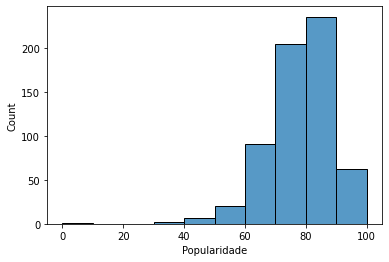

In [12]:
# Criando um histograma simples no Seaborn
sns.histplot(
    df["Popularidade"],
    kde=False,
    bins=10
);

O parâmetro `kde` aproxima uma função de distribuição de probabilidades sobre o conjunto de dados.

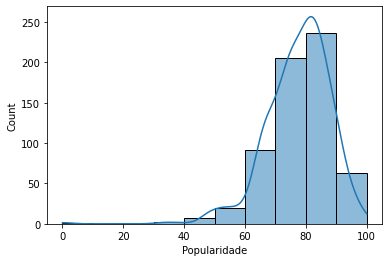

In [13]:
# Criando um histograma simples no Seaborn
sns.histplot(
    df["Popularidade"],
    kde=True,
    bins=10
);

<a id="densidade"></a>
### Gráfico de densidade

Em geral, histogramas são utilizados para visualizar uma única distribuição. No entanto, para visualizar <ins>mais de uma distribuição simultaneamente</ins>, gráficos de densidade são mais apropriados. 

Aqui, a distribuição é visualizada através de uma **curva contínua**. Essa curva precisa ser estimada a partir dos dados e o método mais comumente usado para esse procedimento de estimativa é chamado de <ins>estimativa de densidade de kernel</ins>. 

A seguir, utilizamos o kernel gaussiano do método `seaborn.kdeplot` para estimar a distribuição da popularidade de cada tipo de música presente no nosso conjunto de dados.

In [14]:
# Criando o DataFrame
df = pd.DataFrame({
    'Popularidade': df_hits.popularity,
    'Tipo de Música': df_hits.song_type,
})

> **DICA:** Para retornar apenas a popularidade das músicas Solo, basta executar `df.loc[df['Tipo de Música'] == 'Solo', 'Popularidade']`. 

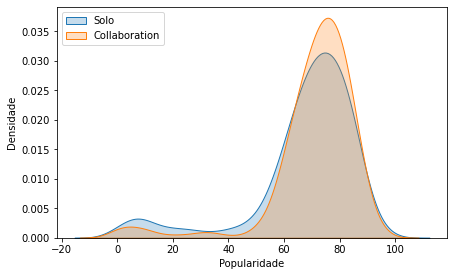

In [15]:
# Plotando duas distribuições em uma mesma figura

# Plot da distribuição das músicas Solo
sns.kdeplot(
    df.loc[df['Tipo de Música'] == 'Solo', 'Popularidade'], # Dataframe fonte dos dados
    shade=True,                                             # Sombra das curvas
    label='Solo'                                            # nome da curva (legenda)                            
)

# Plot da distribuição das músicas Collaboration
sns.kdeplot(
    df.loc[df['Tipo de Música'] == 'Collaboration', 'Popularidade'], # Dataframe fonte dos dados
    shade=True,                                                      # Sombra das curvas
    label='Collaboration'                                            # nome da curva (legenda)
)

# Configurações gerais do gráfico
plt.xlabel("Popularidade")                                  # Título do eixo x
plt.ylabel("Densidade")                                     # Título do eixo y
plt.legend(loc='upper left')                                # Posição da caixa com a legenda

plt.gcf().set_size_inches([7, 4.25])                        # Define o tamanho da figura (em)

<a id="boxplots"></a>
### Boxplots e Gráficos Violino

Assim como os gráficos de densidade, *boxplots* são uma ótima maneira de visualizar distribuições. 

Este tipo de visualização tem a vantagem de ocupar **pouco espaço**, o que é útil ao comparar distribuições entre <ins>muitos grupos</ins> ou conjuntos de dados. 

Aqui, visualizamos as mesmas distribuições do exemplo anterior, porém agora, utilizando o método `seaborn.boxplot`.

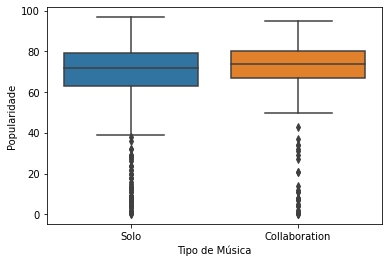

In [16]:
# Criando um boxplot básico no Seaborn
sns.boxplot(x=df["Tipo de Música"], y=df["Popularidade"]);

Podemos aprimorar nosso boxplot adicionando novas informações, como por exemplo a média e intervalo de confiança ao redor da mediana. Para isso, utilizamos os parâmetros:

- `notch`: achata a caixa de forma a indicar o intervalo de confiança ao redor da mediana (o padrão é 95%);
- `showmeans`: exibe o valor médio da distribuição;
- `meanprops`: personaliza características do indicador da média como símbolo, cor, etc.

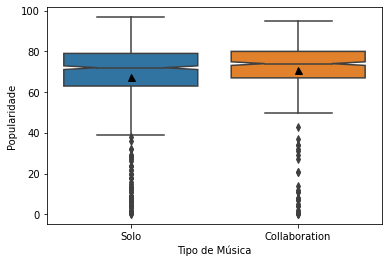

In [17]:
# Aprimorando um boxplot no Seaborn
sns.boxplot(
    x=df["Tipo de Música"], 
    y=df["Popularidade"],
    
    # Novos parâmetros adicionados 
    notch=True,
    showmeans=True,
    meanprops={
        "markerfacecolor":"black",   # Cor do preenchimento do símbolo
        "markeredgecolor":"black",   # Cor das bordas do símbolo
        "markersize":"7"             # Tamanho do símbolo
    }
);

Se considerarmos o *boxplot* anterior, aparentemente, podemos concluir que as <ins>colaborações são em média mais populares do que as músicas solo</ins>. 

No entanto, **não** podemos ver a distribuição subjacente de pontos em cada categoria ou o número de observações. 

Uma alternativa é utilizar **gráficos violino**, que descrevem a distribuição permitindo uma compreensão mais profunda da distribuição. A seguir, utilizamos o método `seaborn.violinplot` para melhor visualizarmos as distribuições anteriores.

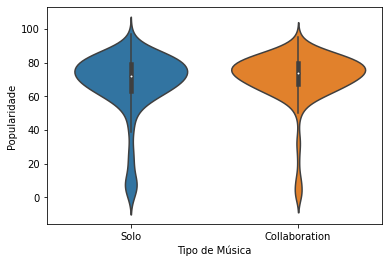

In [18]:
# Criando um gráfico violino
sns.violinplot(x=df["Tipo de Música"], y=df["Popularidade"]);

---

<a id="correlacao"></a>
## Correlação

Ao visualizarmos uma correlação, estamos interessados em analisar **como duas variáveis se relacionam entre si**. 

Para representar graficamente a relação de duas dessas variáveis, por exemplo, a <ins>popularidade e a duração da música</ins>, geralmente utilizamos um gráfico de dispersão. 

Nos exemplos a seguir, vamos explorar o gráfico de dispersão básico e algumas variações, incluindo gráficos de bolhas e correlogramas. Para todos os exemplos, consideramos a tabela `Track` do conjunto de dados.

<a id="dispersao"></a>
### Gráfico de Dispersão

Neste gráfico, para cada instância dos dados (representada por um ponto), o valor de sua primeira variável é representado no eixo X, a segunda no eixo Y. 

A seguir, plotamos dois gráficos de dispersão sobre a popularidade em relação à duração e energia das músicas, respectivamente. Para isso, utilizamos o método `matplotlib.pyplot.scatter`.

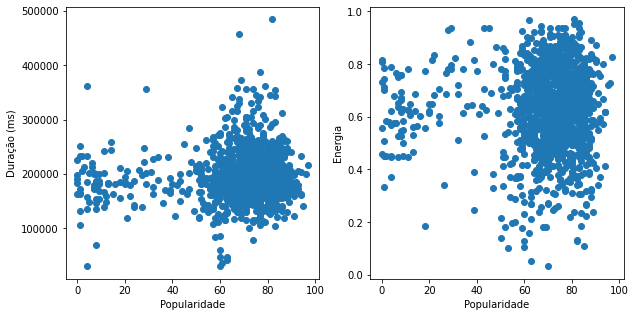

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

# popularidade vs. duração
ax[0].scatter(x = df_hits['popularity'], y = df_hits['duration_ms']) 
ax[0].set_xlabel("Popularidade")
ax[0].set_ylabel("Duração (ms)")

# popularidade vs. energia
ax[1].scatter(x = df_hits['popularity'], y = df_hits['energy']) 
ax[1].set_xlabel("Popularidade")
ax[1].set_ylabel("Energia");

> **DICA:** Geralmente, linhas ou curvas são ajustadas dentro do gráfico de dispersão para auxiliar a análise. Utilizando o método `seaborn.regplot`, plotamos os mesmos gráficos de dispersão mas, agora, com uma reta vermelha representando o ajuste linear.

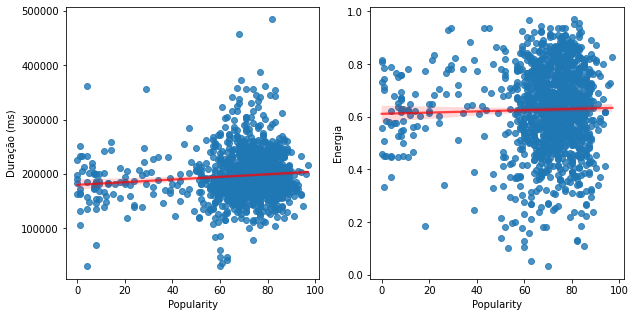

In [20]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5)) # Inicializa a figura

# Criando um gráfico de dispersão com o ajuste linear
sns.regplot(
    x='popularity', 
    y='duration_ms', 
    data=df_hits,
    ax=axs[0], 
    # Personalização da linha
    line_kws={"color":"r",
              "alpha":0.7}
)
axs[0].set(xlabel='Popularity', ylabel='Duração (ms)')


sns.regplot(
    x='popularity', 
    y='energy', 
    data=df_hits,
    ax=axs[1], 
    # Personalização da linha
    line_kws={"color":"r",
              "alpha":0.7}
)
axs[1].set(xlabel='Popularity', ylabel='Energia');

<a id="bolhas"></a>
### Gráfico de bolhas

É um gráfico de dispersão onde uma **terceira dimensão é adicionada**.

Este tipo de gráfico recebe três variáveis numéricas como entrada: uma é representada pelo eixo x, uma pelo eixo y e uma pelo tamanho dos pontos. 

No exemplo a seguir, vamos juntar as três variáveis do exemplo anterior: <ins>duração em milissegundos, popularidade e energia</ins>. 

Vamos utilizar a função `seaborn.scatterplot()` para criar um gráfico de bolhas. Esta função possui um parâmetro que controla o tamanho do círculo de acordo com uma variável numérica do conjunto de dados. No nosso caso, a variável numérica consiste no atributo `energy`.

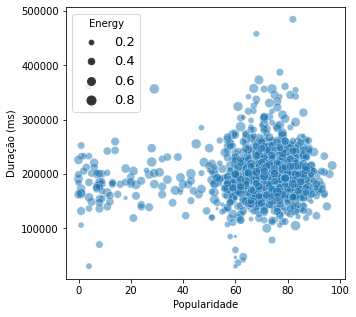

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(
    data=df_hits,
    x="popularity", 
    y="duration_ms",
    size="energy", 
    alpha=0.5,
    sizes=(5, 100)
)

ax.set_xlabel('Popularidade')
ax.set_ylabel('Duração (ms)')
plt.legend(title='Energy', loc='upper left', fontsize=13);

<a id="correlogramas"></a>
### Correlogramas

Quando queremos analisar visualmente a **correlação entre muitas variáveis** de uma só vez, correlogramas podem ser uma boa opção.

Meste tipo de gráfico, a relação entre cada par de variáveis é visualizada através de um gráfico de dispersão, enquanto a diagonal representa a distribuição de cada variável, usando um histograma ou um gráfico de densidade.

> **DICA:** Utilizar a função `seaborn.pairplot()` é definitivamente a melhor maneira de construir um correlograma em Python. 

No exemplo a seguir, vamos criar um correlograma básico de um subconjunto de quatro variáveis numéricas do nosso conjunto de músicas.

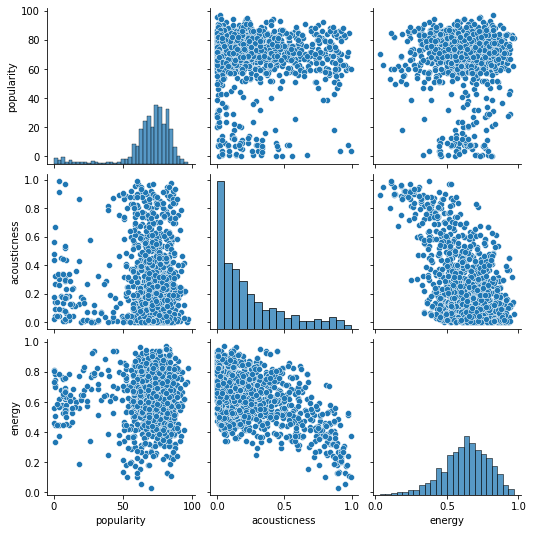

In [22]:
df = df_hits[['popularity', 'acousticness', 'energy']]
sns.pairplot(df); # criando um correlograma

---

<a id="evolucao"></a>
## Evolução

Ao visualizarmos uma evolução, estamos interessados em analisar uma <ins>tendência</ins> nos dados ao longo de intervalos de tempo — uma **série temporal**. 

Nestes casos, **gráficos de linha e de área** são frequentemente utilizados, sendo semelhantes a um gráfico de dispersão, porém os pontos de medição são ordenados e unidos com segmentos de linha reta. 

Nos exemplos a seguir, vamos analisar a evolução de algumas variáveis do nosso conjunto de dados `Charts`, utilizando gráficos de linha e de área.

In [23]:
# Junção dos dois DataFrames
df_merged = pd.merge(df_charts, df_hits, on='song_id')
df_merged.head()

,chart_week,position,track_name,...,speechiness,valence,tempo
0,2020-01-02,1,Dance Monkey,...,0.0988,0.54,98.078
1,2020-01-09,1,Dance Monkey,...,0.0988,0.54,98.078
2,2020-01-16,1,Dance Monkey,...,0.0988,0.54,98.078
3,2020-01-23,1,Dance Monkey,...,0.0988,0.54,98.078
4,2020-01-30,1,Dance Monkey,...,0.0988,0.54,98.078


In [24]:
# Agrupando o DataFrame resultante pela semana do chart e calculando a média das variáveis numéricas
df = df_merged.groupby(['chart_week']).mean()
df = df.reset_index()
df.head()

,chart_week,position,streams,...,speechiness,valence,tempo
0,2020-01-02,100.5,8.668001e+06,...,0.114236,0.506992,120.497925
1,2020-01-09,100.5,8.895528e+06,...,0.117612,0.499849,118.843115
2,2020-01-16,100.5,9.715822e+06,...,0.118124,0.504840,118.506960
3,2020-01-23,100.5,1.043578e+07,...,0.128637,0.500209,118.277825
4,2020-01-30,100.5,9.640961e+06,...,0.126172,0.505805,118.740055


<a id="linha"></a>
### Gráfico de linha

Exibe a evolução de uma ou várias variáveis numéricas, onde os dados são conectados por segmentos de linha reta e são frequentemente usados para **visualizar tendências e analisar como os dados mudaram ao longo do tempo**. 

A seguir, mostramos a construção de um gráfico de linha, analisando a evolução da média de streams durante 2020. Inicialmente, utilizamos a função `matplotlib.pyplot.plot()` para criar um gráfico de dispersão e, em seguida, usamos a mesma função para criar o gráfico de linha simples.

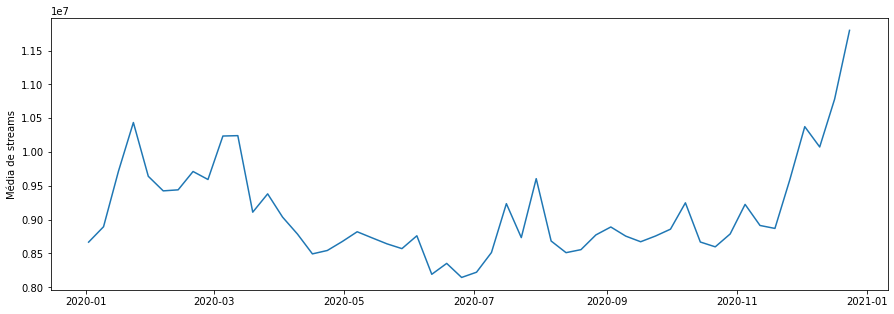

In [25]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot('chart_week', 'streams', '-', data=df)
ax.set_ylabel("Média de streams")

plt.show()

Com os pontos conectados por uma linha, a visualização dá **mais ênfase à tendência geral dos dados** e menos às observações individuais. 

Para enfatizar ainda mais a tendência geral nos dados, também <ins>é possível preencher a área sob a curva</ins> com uma cor sólida. Neste caso, criaríamos um gráfico de área, exemplificado a seguir.

<a id="area"></a>

### Gráfico de área

Assim como os gráficos de linha, os gráficos de área são usados para exibir a evolução de valores quantitativos cronologicamente. Eles são mais comumente usados para mostrar **tendências**, em vez de transmitir valores específicos. 

Para criar um gráfico de área simples, existem duas funções principais usando Matplotlib: `fill_between()` e `stackplot()`. A seguir, plotamos a mesma série temporal do exemplo anterior, mas utilizando ambas funções.

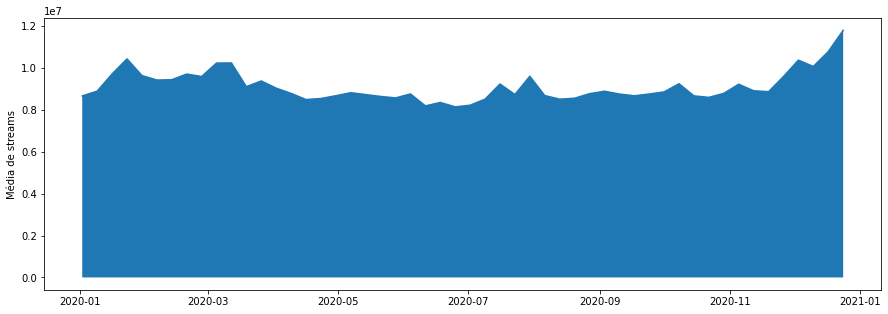

In [26]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.plot('chart_week', 'streams', '-', data=df)
ax.fill_between('chart_week', 'streams', data=df)  # preenche a área de área
ax.set_ylabel("Média de streams");

---

## Conclusão

Este notebook apresentou as principais técnicas de visualização de dados usando Jupyter.

O próximo notebook ([6.1.IPython.ipynb](https://drive.google.com/file/d/15USH7OC288FpzVNnBpBDg03GTXkigXvm/view?usp=sharing)) apresenta IPython, iniciando a seção de Jupyter Avançado.

<br><br><br>
<a id="extra"></a>

---
---

## Conteúdo Extra 

### Personalização

Uma das maiores vantagens de se usar o Matplotlib/Seaborn para gerar gráficos é que você pode **personalizar** absolutamente (ou quase) tudo neles. 

> **DICA:** A quantidade de opções disponíveis para personalização é imensa, e uma das vantagens de se usar uma linguagem de programação tão popular quanto Python é a grande **disponibilidade de exemplos e tutoriais** sobre isso na Internet. 

Aqui, vamos focar em quatro tipos de personalização básicas:

- [Cores](#cores)
- [Estilos](#estilos)
- [Eixos](#eixos)
- [Fontes](#fontes)

Essas personalizações podem transformar os gráficos, deixando-os mais <ins>sofisticados e apresentáveis</ins>.

Para ilustrar melhor, vamos trabalhar com um gráfico de linhas para acompanhar a **evolução da média de streams de músicas solo e colaborações em 2020**. 

In [27]:
# Monta os DataFrames que servirão de base para gerar os gráficos
df_evolution = pd.merge(df_charts, df_hits, on='song_id')[['chart_week', 'song_type', 'streams']]

df_solo = df_evolution[df_evolution['song_type'] == 'Solo'].groupby(by=['chart_week']).mean()
df_collab = df_evolution[df_evolution['song_type'] == 'Collaboration'].groupby(by=['chart_week']).mean()

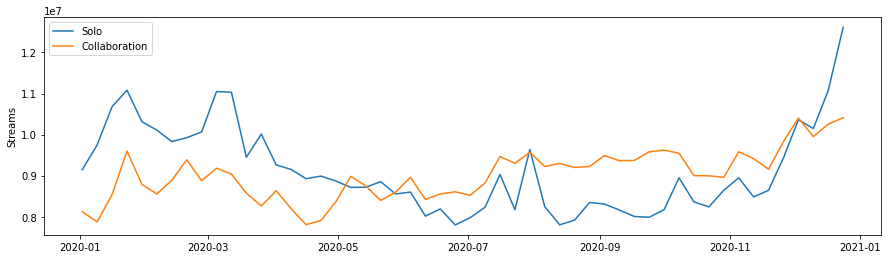

In [28]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo")
ax.plot(df_collab, label="Collaboration")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="cores"></a>
#### Cores

Quando plotamos gráficos no Matplotlib, o pacote geralmente utiliza as cores padrão, que nem sempre são as melhores ou mais apresentáveis. Felizmente, podemos facilmente alterar as cores das coisas que plotamos através do parâmetro `color` da função `plot`. 

O Matplotlib aceita algumas cores [nomeadas](https://matplotlib.org/stable/gallery/color/named_colors.html) e também códigos hexadecimais, RGB e CMYK. 

Aqui, escolhemos a cor de cada linha através de seu código hexadecimal. Por exemplo, para músicas Solo, escolhemos uma cor cujo código é `#1b9e77`.

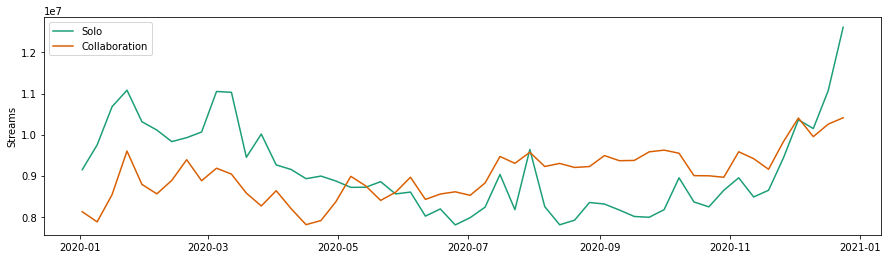

In [29]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77")
ax.plot(df_collab, label="Collaboration", color="#d95f02")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="estilos"></a>
#### Estilos

Um outro ponto que devemos nos preocupar é o estilo das linhas. Na vida profissional, é bastante comum fazer gráficos para serem anexadas em artigos e/ou relatórios, que quase sempre são impressos em escala de cinza. Assim, as cores das linhas que serviam para diferenciá-las umas das outras, perdem sua utilidade pois muitas são impressas em tons muito semelhantes de cinza. 

Portanto, é necessário encontrar uma forma a mais para diferenciá-las. O Matplotlib nos oferece a opção de escolher [estilos variádos](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html) para nossas linhas (contínua, pontilhada, tracejada, etc.) através do parâmetro `linestyle` presente na função `plot`.

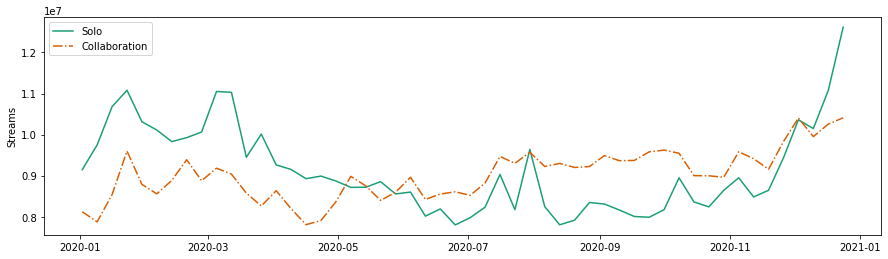

In [30]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="eixos"></a>
#### Eixos

Os eixos também são partes importantes dos nossos gráficos, pois lá estão contidas informações relevantes sobre escalas, valores de referência e nome das variáveis categóricas. Aqui, nossas alterações focam em dois pontos principais:

- Remoção das bordas da figura do gráfico (através do método `spines`)
- Adição de *grids* internos para facilitar a visualização de pontos no gráfico

In [31]:
from matplotlib.dates import DateFormatter

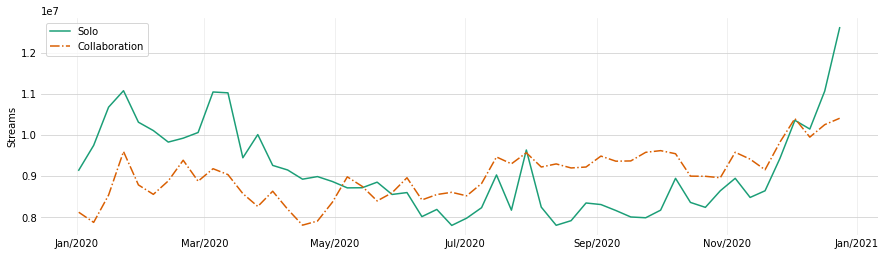

In [32]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend()

# Altera nome dos eixos
plt.xlabel("")                                 # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
plt.ylabel("Streams")

# Formata o texto dos eixos
ax.xaxis.set_major_formatter(DateFormatter("%b/%Y")) # Formato da data (%b - abreviação do mês)

# Remove bordas e ticks dos eixos x e y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Adiciona grid interno
ax.xaxis.grid(linestyle='-', color='#ededed')
ax.yaxis.grid(linestyle='-', color='#d1d1d1')

# Exibir e salvar
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<a name="fontes"></a>
#### Fontes

A última personalização desse Notebook diz respeito às fontes usadas no gráfico. O Matplotlib permite ao usuário utilizar qualquer fonte instalada em seu computador nos gráficos. Além disso, o tamanho das fontes nos eixos, legendas e título podem ser alteradas separadamente (ou seja, podemos aplicar valores distintos) para deixar nosso gráfico mais adequado ao seu propósito.

Neste último exemplo, aumentamos o tamanho do texto da legenda e do eixo y através do parâmetro `fontsize`.

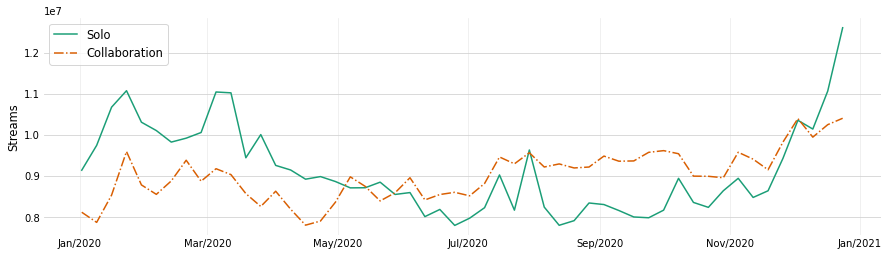

In [33]:
# Define o tamanho da figura
fig, ax = plt.subplots(figsize=(15, 4))        # O tamanho será de 15x4 polegadas (largura, altura)

# Plota a linha de evolução da soma dos streams pra músicas Solo/Collab
ax.plot(df_solo, label="Solo", color="#1b9e77", linestyle="-")
ax.plot(df_collab, label="Collaboration", color="#d95f02", linestyle="-.")

# Mostra a legenda (cada cor uma tipo)
plt.legend(fontsize=11.5)

# Altera nome dos eixos
ax.set_xlabel("")                              # Aqui optei por tirar o nome do eixo x, mas poderia ser 'Data'
ax.set_ylabel("Streams", fontsize=11.5)

# Formata o texto dos eixos
ax.xaxis.set_major_formatter(DateFormatter("%b/%Y")) # Formato da data (%b - abreviação do mês)

# Remove bordas e ticks dos eixos x e y
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)

# Adiciona grid interno
ax.xaxis.grid(linestyle='-', color='#ededed')
ax.yaxis.grid(linestyle='-', color='#d1d1d1')

# Exibir e salvar
#plt.savefig('lineplot.pdf')                    # Salva a imagem em formato PDF 
plt.show()                                     # Esse comando é somente para mostrar a figura aqui embaixo

<br><br>
<a id="interativos"></a>

---

### Gráficos interativos

Uma outra possibilidade do Jupyter é a construção de **ferramentas interativas** com o IPython. Este já é um conceito mais avançado, que será detalhado na próxima parte do curso.

Aqui, vamos nos concentrar na apresentação de gráficos interativos utilizando as bibliotecas `plotly` e `cufflinks`.

> **IMPORTANTE:** Se você ainda não possui essas bibliotecas instaladas, utilize o comando `!pip install plotly & pip install cufflinks` em uma célula separada.

In [34]:
%matplotlib inline
from IPython.display import HTML

import plotly.offline as py
from plotly.offline import iplot
import plotly.graph_objs as go

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

Vamos continuar no exemplo do gráfico de linhas para comparar a evolução da média de streams de músicas solo e colaborações em 2020. 

In [35]:
# Conjunto de dados que serão plotados no gráfico interativo
# A variável data contém as duas linhas (Solo/Collab)
data = [go.Scatter(x=df_solo.index, y=df_solo['streams'], marker_color='#1b9e77', name='Solo'),
        go.Scatter(x=df_collab.index, y=df_collab['streams'], marker_color='#d95f02', name='Collaboration')]

# Configura alguns parâmetros do plot, como título e nome dos eixos
layout = go.Layout(title="Stream Comparison of Songs", yaxis=dict(title='Average Streams'))

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

Agora, vamos para um exemplo mais prático, que é a **matriz de correlação** entre as features acústicas dos `Hits`. 

Esta matriz foi introduzida no notebook anterior, quando discutimos o conceito de correlações.

In [36]:
df_hits.corr()

,popularity,explicit,track_number,...,speechiness,valence,tempo
popularity,1.000000,-0.049697,-0.059673,...,0.010341,0.032775,0.003640
explicit,-0.049697,1.000000,0.113816,...,0.328718,-0.108461,0.072804
track_number,-0.059673,0.113816,1.000000,...,-0.019669,-0.060618,0.006224
num_artists,0.068568,0.133949,-0.050959,...,0.103072,0.162001,0.084059
num_available_markets,0.761699,-0.019580,0.048500,...,0.067078,0.027777,0.016319
duration_ms,0.098094,-0.043412,0.060341,...,-0.096676,-0.125785,0.013603
key,0.015154,-0.028635,-0.032405,...,0.037189,0.054193,-0.022747
mode,-0.061275,-0.063131,0.015148,...,-0.058082,0.006177,0.021584
time_signature,0.031860,0.020660,-0.016637,...,0.078520,0.095659,-0.008865
acousticness,-0.039398,-0.161020,0.073224,...,-0.142528,-0.088887,-0.098731


Quando existem muitas variáveis que desejamos analisar, uma matriz numérica pode não ser a melhor visualização. 

Por isso, podemos plotar um **_heatmap_** (mapa de calor) para visualizar tais correlações.

Uma visualização interativa pode ser bem útil para isso, pois conseguimos visualizar, para cada célula, as variáveis correlacionadas e o valor da correlação.

In [38]:
df_hits.corr().iplot(kind='heatmap', 
                     colorscale="RdBu", 
                     title="Feature Correlation Matrix")

---

## Referências e Links Externos

- [Python Graph Gallery](https://www.python-graph-gallery.com/)
- [Matplotlib - Documentação](https://matplotlib.org/stable/api/)
- [Seaborn - Documentação](https://seaborn.pydata.org/)
- [Plotly - documentação](https://plotly.com/python-api-reference/)